In [63]:
using Gadfly

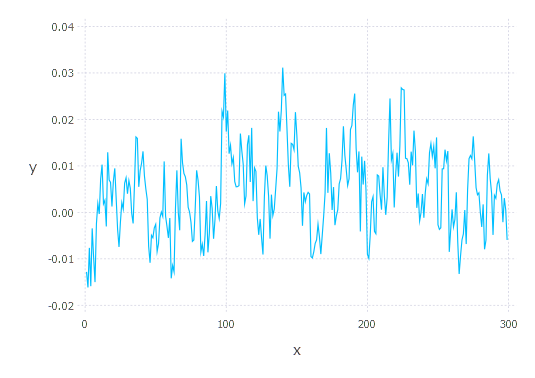

In [140]:
T = 300
ϕ = 0.8
uncond_var = (0.01)^2
uncond_exp = 0.005
σ2 = uncond_var*(1-ϕ^2)
μ  = uncond_exp*(1-ϕ)

x_logdiff = zeros(T-1)
x_logdiff[1] = sqrt(σ2/(1-ϕ^2))*randn() + μ/(1-ϕ)
for t=2:T-1
    x_logdiff[t] = μ + ϕ*x_logdiff[t-1] + sqrt(σ2)*randn()
end

plot(x=1:T-1, y=x_logdiff, Geom.line)

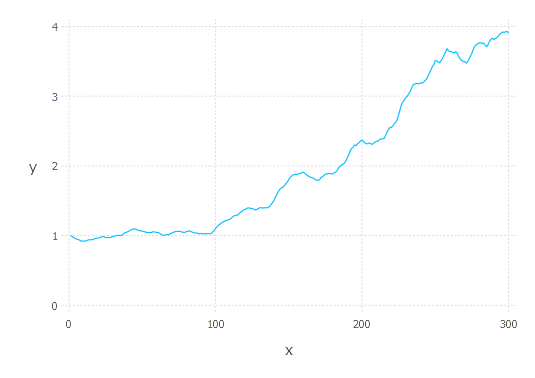

In [141]:
x = exp.([0., cumsum(x_logdiff)...])
plot(x=1:T, y=x, Geom.line)

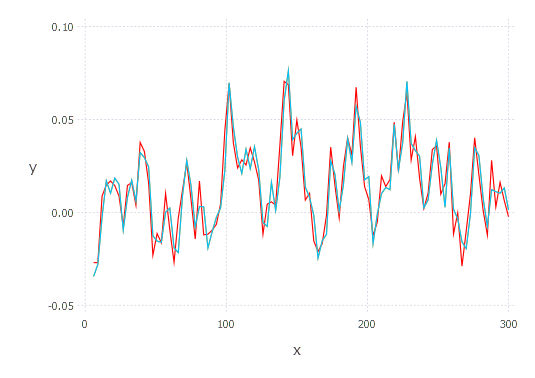

In [142]:
xq = vec(sum(reshape(x,3,Int64(T/3)),1))
xq_logdiff = log.(xq[2:end]) - log.(xq[1:end-1])
xq_logdiff_approx = x_logdiff[5:3:end] + 2*x_logdiff[4:3:end-1] + 3*x_logdiff[3:3:end-2] + 2*x_logdiff[2:3:end-3] + x_logdiff[1:3:end-4] 
xq_logdiff_approx2 = x_logdiff[5:3:end] + x_logdiff[4:3:end-1] + x_logdiff[3:3:end-2]
plot(
    layer(x=6:3:T, y=xq_logdiff, Geom.line),
    layer(x=6:3:T, y=1/3*xq_logdiff_approx, Geom.line, Theme(default_color="orange")),
    layer(x=6:3:T, y=xq_logdiff_approx2, Geom.line, Theme(default_color="red"))
    )

In [143]:
maximum(abs.(xq_logdiff-1/3*xq_logdiff_approx))

0.000157556906430531

In [144]:
maximum(abs.(xq_logdiff-xq_logdiff_approx2))

0.021580159913891117